In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from adjustText import adjust_text
from datetime import datetime

In [2]:
# Read data from csv into pandas DataFrame
df = pd.read_csv('Sleep_Efficiency.csv').dropna().reset_index().drop(['Wakeup time', 'ID', 'index', 'Light sleep percentage'], axis = 1)
df

,Age,Gender,Bedtime,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,6.0,0.88,18,70,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,7.0,0.66,19,28,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,8.0,0.89,20,70,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,6.0,0.51,23,25,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,8.0,0.76,27,55,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,30,Female,2021-11-16 23:00:00,7.5,0.53,28,20,4.0,50.0,2.0,Yes,1.0
384,27,Female,2021-11-13 22:00:00,7.5,0.91,22,57,0.0,0.0,0.0,No,5.0
385,52,Male,2021-03-31 21:00:00,6.0,0.74,28,57,4.0,25.0,0.0,No,3.0
386,45,Male,2021-07-29 21:00:00,7.0,0.76,18,72,3.0,0.0,0.0,No,3.0


In [3]:
def time_to_float(dt):
    hour = dt.hour
    if hour < 4:
        hour += 24
    return hour + dt.minute / 60.0

# Convert bedtime to float
df['Bedtime'] = pd.to_datetime(df['Bedtime']).apply(time_to_float)

In [4]:
# Create dummy variables from categorical ones
df = pd.get_dummies(df, columns=['Gender', 'Smoking status'], drop_first=True)
df['Gender Male'] = df['Gender_Male'].astype(int)
df['Smoker'] = df['Smoking status_Yes'].astype(int)
df = df.drop(['Gender_Male', 'Smoking status_Yes'], axis = 1)

df

,Age,Bedtime,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender Male,Smoker
0,65,25.0,6.0,0.88,18,70,0.0,0.0,0.0,3.0,0,1
1,69,26.0,7.0,0.66,19,28,3.0,0.0,3.0,3.0,1,1
2,40,21.5,8.0,0.89,20,70,1.0,0.0,0.0,3.0,0,0
3,40,26.5,6.0,0.51,23,25,3.0,50.0,5.0,1.0,0,1
4,57,25.0,8.0,0.76,27,55,3.0,0.0,3.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,30,23.0,7.5,0.53,28,20,4.0,50.0,2.0,1.0,0,1
384,27,22.0,7.5,0.91,22,57,0.0,0.0,0.0,5.0,0,0
385,52,21.0,6.0,0.74,28,57,4.0,25.0,0.0,3.0,1,0
386,45,21.0,7.0,0.76,18,72,3.0,0.0,0.0,3.0,1,0


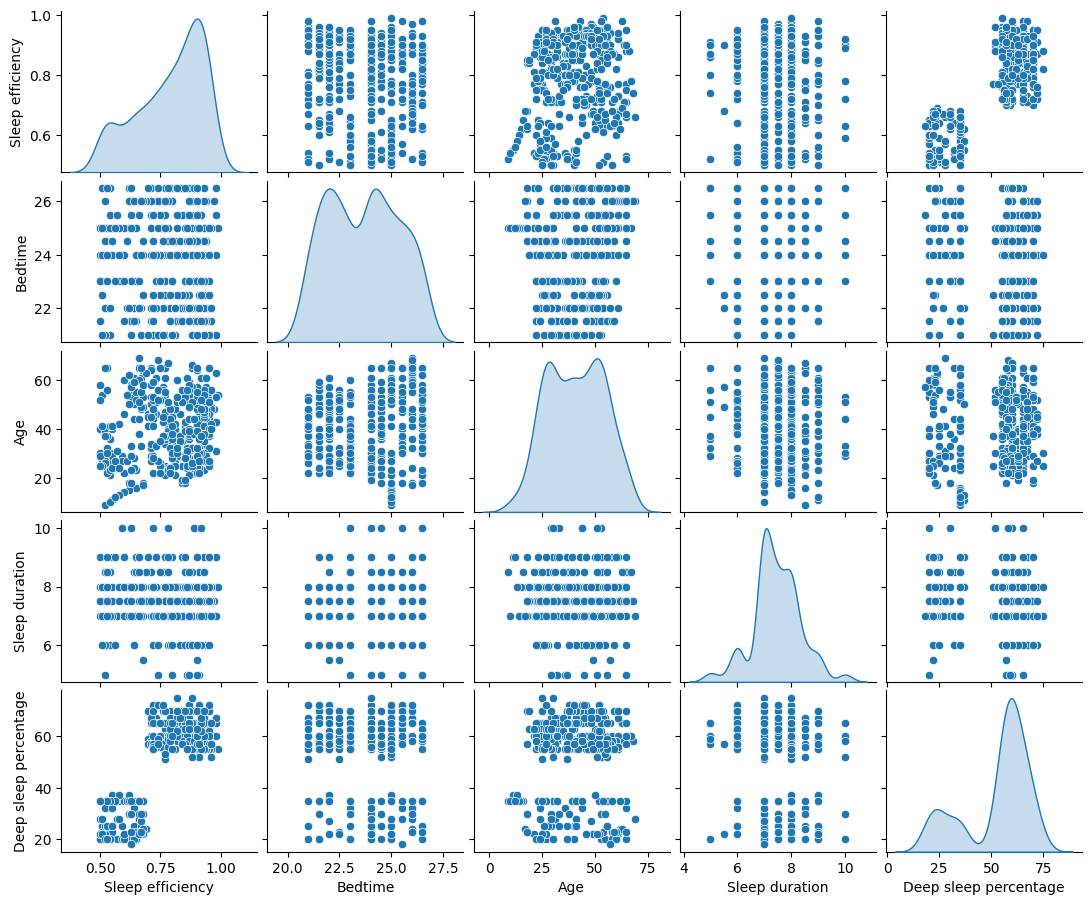

In [5]:
# Pair plots
pair_plot = sns.pairplot(df, vars = ['Sleep efficiency', 'Bedtime', 'Age', 'Sleep duration', 'Deep sleep percentage'], diag_kind='kde')
pair_plot.fig.set_size_inches(11, 9)
plt.show()

In [6]:
# Fix target and features
target = 'Sleep efficiency'
features = list(set(df.columns) - set([target]))

y_train = df[target]
X = df[features]

# Perform Linear Regression
X_train = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep efficiency   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.17e-126
Time:                        23:13:54   Log-Likelihood:                 542.38
No. Observations:                 388   AIC:                            -1061.
Df Residuals:                     376   BIC:                            -1013.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3832      0.062      6.229      0.000       0.262       0.504
Gender Male               0.0015      0.007      0.220      0.826      -0.012       0.015
Age                       0.0010      0.000      3.989      0.000       0.000       0.001
Exercise frequency        0.0058      0.002      2.422      0.016       0.001       0.011
Sleep duration            0.0021      0.004      0.588      0.557      -0.005       0.009
Awakenings               -0.0318      0.003    -12.554      0.000      -0.037      -0.027
Bedtime                  -0.0015      0.002     -0.753      0.452      -0.006       0.002
REM sleep percentage      0.0066      0.001      7.006      0.000       0.005       0.008
Smoker                   -0.0449      0.007     -6.478      0.000      -0.059      -0.031
Alcohol consumption      -0.0061      0.002     -2.901      0.004      -0.010      -0.002
Deep sleep percentage     0.0056      0.000     23.405      0.000       0.005       0.006
Caffeine consumption      0.0002      0.000      2.175      0.030    2.36e-05       0.000
==============================================================================
Omnibus:                        8.541   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.599
Skew:                          -0.338   Prob(JB):                       0.0136
Kurtosis:                       2.726   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
restricted_features = ['Age', 'Exercise frequency', 'Deep sleep percentage', 'Smoker', 
                       'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'REM sleep percentage']

# Form restricted model and display summary
X_restricted = sm.add_constant(df[restricted_features])
restricted_model = sm.OLS(y_train, X_restricted).fit()
display(restricted_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep efficiency   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     195.5
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.93e-129
Time:                        23:13:54   Log-Likelihood:                 541.95
No. Observations:                 388   AIC:                            -1066.
Df Residuals:                     379   BIC:                            -1030.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3634      0.030     12.193      0.000       0.305       0.422
Age                       0.0010      0.000      4.071      0.000       0.000       0.001
Exercise frequency        0.0065      0.002      2.899      0.004       0.002       0.011
Deep sleep percentage     0.0056      0.000     23.518      0.000       0.005       0.006
Smoker                   -0.0458      0.007     -6.875      0.000      -0.059      -0.033
Awakenings               -0.0318      0.002    -12.753      0.000      -0.037      -0.027
Caffeine consumption      0.0002      0.000      2.119      0.035    1.68e-05       0.000
Alcohol consumption      -0.0062      0.002     -2.942      0.003      -0.010      -0.002
REM sleep percentage      0.0066      0.001      7.133      0.000       0.005       0.008
==============================================================================
Omnibus:                        8.706   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.723
Skew:                          -0.338   Prob(JB):                       0.0128
Kurtosis:                       2.714   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Normalize data
X_std = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_std)

# Show results
display(pd.DataFrame(principal_components, columns = [f'PC{i + 1}' for i in range(len(X_std.columns))]))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.168427,1.229651,-1.335099,1.123332,1.583055,0.990198,0.741609,-1.474317,-0.301823,-1.848930,-0.456425
1,2.325403,2.773562,-0.248019,0.756985,0.452866,0.482102,0.785542,0.294913,-0.081101,-1.084594,-0.924156
2,-2.017710,-0.074353,-0.054976,-1.128084,-0.798300,-0.047487,0.203806,-0.507173,-0.523162,-0.928882,0.006956
3,3.393048,-0.531385,0.940720,0.749964,1.562873,1.289318,1.056250,-0.233887,0.822832,-0.590112,0.116006
4,0.749652,1.731000,0.402883,-0.014172,-0.344814,-1.753135,0.539100,0.583918,1.137015,-0.128917,0.670680
...,...,...,...,...,...,...,...,...,...,...,...
383,2.593690,-1.580133,1.867044,0.751846,-0.266370,-0.126781,-0.924857,0.352073,-0.495025,-0.683667,0.189843
384,-2.356817,-0.237723,1.088095,-0.416783,-1.101212,0.437169,0.116623,-0.695065,0.719733,-0.934381,-0.977471
385,-0.719982,1.090526,1.918328,-0.198201,1.542840,-1.378915,-1.630664,1.191232,-0.230782,-0.442546,0.396805
386,-1.605711,1.654022,0.054862,-1.662684,0.278211,0.378937,-0.952032,0.786194,-0.673122,-0.536102,0.227219


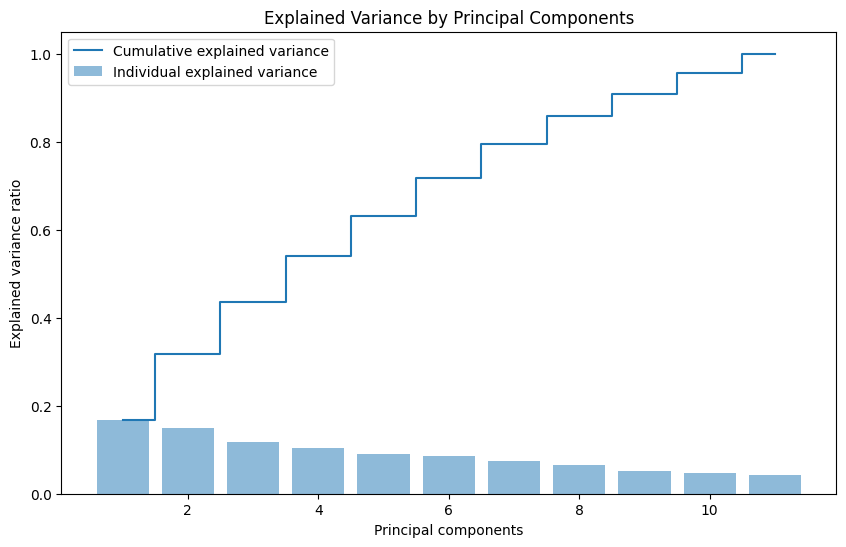

Explained variation with first 1 Principal Components: 16.8000%
Explained variation with first 2 Principal Components: 31.7211%
Explained variation with first 3 Principal Components: 43.5697%
Explained variation with first 4 Principal Components: 54.0549%
Explained variation with first 5 Principal Components: 63.1917%
Explained variation with first 6 Principal Components: 71.8640%
Explained variation with first 7 Principal Components: 79.3890%
Explained variation with first 8 Principal Components: 85.8466%
Explained variation with first 9 Principal Components: 90.9020%
Explained variation with first 10 Principal Components: 95.6746%
Explained variation with first 11 Principal Components: 100.0000%


In [9]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Print explained variation after adding each PC
for i, variance in enumerate(np.cumsum(explained_variance)):
    print(f"Explained variation with first {i + 1} Principal Components: {variance * 100:.4f}%")

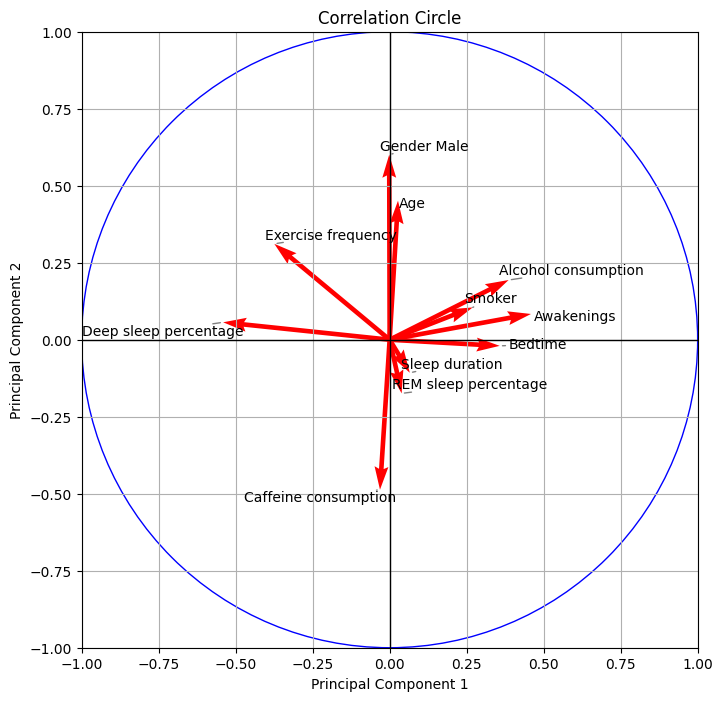

In [10]:
def plot_correlation_circle(pca, features):
    plt.figure(figsize=(8, 8))
    pcs = pca.components_
    plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
               pcs[0, :], pcs[1, :], 
               angles='xy', scale_units='xy', scale=1, color='r')
    
    texts = []
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
        texts.append(plt.text(x, y, features[i], color='black', ha='center', va='center'))
    
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.title('Correlation Circle')
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    plt.gca().add_artist(circle)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.gca().set_aspect('equal')
    
    adjust_text(texts, only_move={'points': 'xy', 'text': 'xy'}, arrowprops=dict(arrowstyle='-', color='gray'))
    
    plt.show()

# Plot the correlation circle for the first two principal components
plot_correlation_circle(pca, X_std.columns)

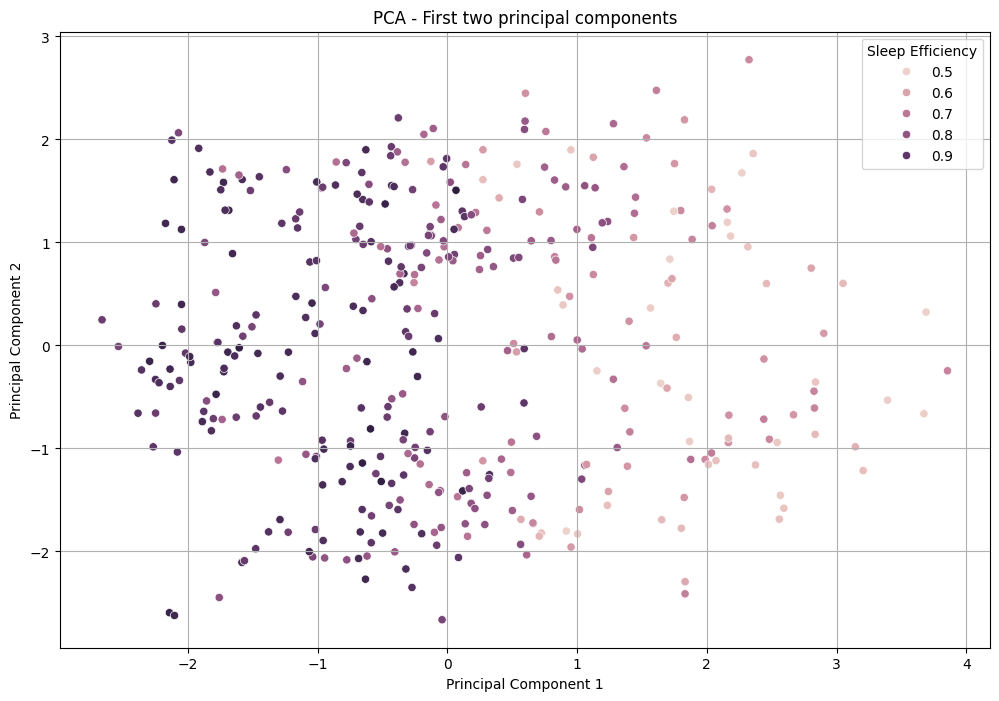

In [11]:
# Selecting the first two principal components
pca_df = pd.DataFrame(data=principal_components[:, :2], columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Sleep Efficiency'] = y_train

# Plotting the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', hue = 'Sleep Efficiency', data = pca_df)
plt.title('PCA - First two principal components')
plt.grid(True)
plt.show()